In [ ]:
# make a webhook call with an empty body:

import requests
import json

# Replace with your actual webhook URL
webhook_url = 'https://noam.app.n8n.cloud/webhook/6ac2c534-dfb0-4b96-9d75-2b9ba36fdbe8'

# Define the headers
headers = {'Content-Type': 'application/json'}

# Define the empty payload
payload = {
    "Customer_name": "Lennart",
    "past_conversation": """Hey Lennart,\n\nHope this email finds you well! We noticed it's been a while since your last visit to our restaurant, and we miss seeing you around.\n\nNext week, we'd love to have you back! As a small token of our appreciation, enjoy a special 20% discount on your meal. Plus, we've got a surplus of fresh ingredients that we'd hate to see go to waste – so it's a win-win!\n\nLooking forward to serving you again soon.\n\nWarm regards!"""
}

# Make a POST request with the empty JSON payload
response = requests.get(webhook_url, headers=headers, data=json.dumps(payload))

# Print the status code and response (for debugging)
print(f'Status Code: {response.status_code}')
print(f'Response: {response.text}')


Loaded model for burger_sales
Loaded model for salad_sales
Loaded model for pizza_sales
Loaded model for ice_cream_sales

Predictions for burger_sales:
Day 1: 109.85
Day 2: 94.54
Day 3: 97.26

Predictions for salad_sales:
Day 1: 81.78
Day 2: 77.77
Day 3: 75.34

Predictions for pizza_sales:
Day 1: 119.91
Day 2: 85.43
Day 3: 88.94

Predictions for ice_cream_sales:
Day 1: 16.49
Day 2: 16.39
Day 3: 14.75


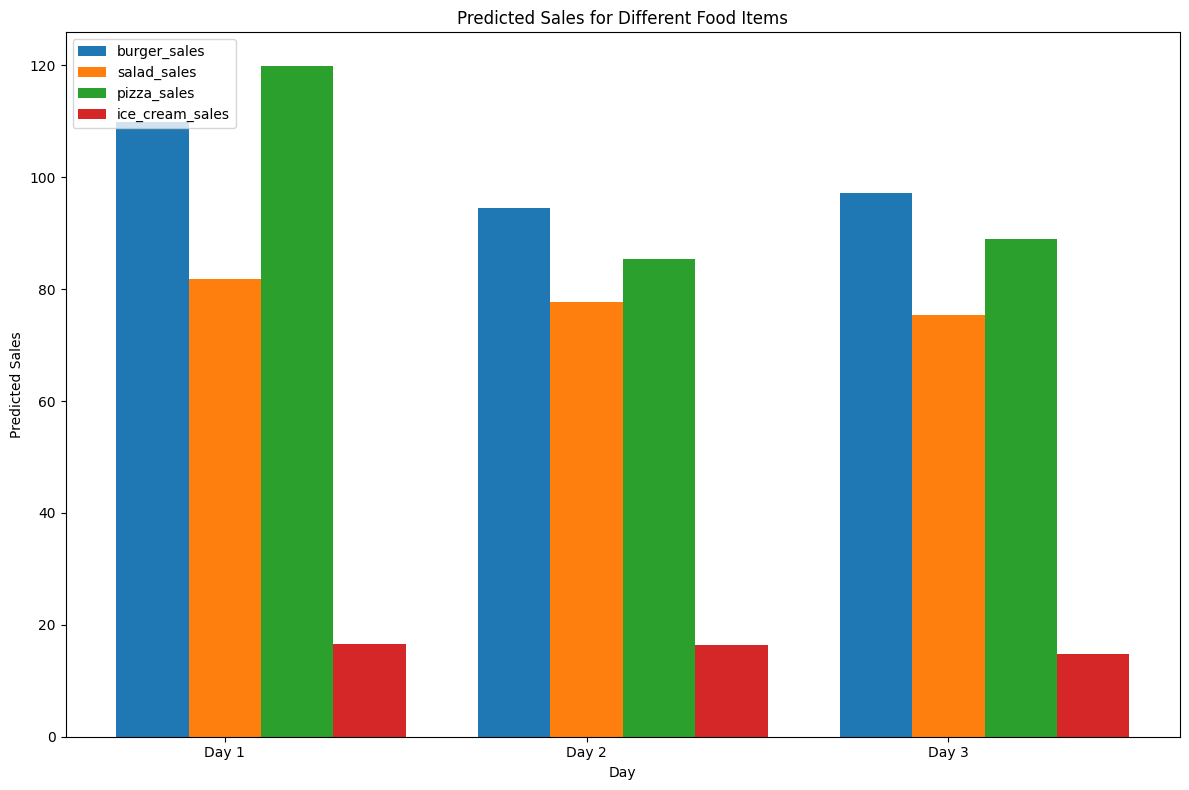


Predictions Summary:
     Day  burger_sales  salad_sales  pizza_sales  ice_cream_sales
0  Day 1    109.853645    81.782099   119.908917        16.486016
1  Day 2     94.540481    77.774442    85.427376        16.393477
2  Day 3     97.262030    75.337135    88.937608        14.748781


In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Step 1: Load the saved models
food_items = ['burger_sales', 'salad_sales', 'pizza_sales', 'ice_cream_sales']
models = {}

for item in food_items:
    model_filename = f'{item}_gradientboosting_model.pkl'
    with open(model_filename, 'rb') as f:
        models[item] = pickle.load(f)
    print(f"Loaded model for {item}")

# Step 2: Prepare your new weather data
# Example of new weather data (replace with your actual new data)
new_weather_data = pd.DataFrame({
    'temperature_2m_mean': [5.2, 4.7, 8.7],
    'sunshine_duration': [17859.23, 0.00, 3789.20],
    'rain_sum': [1.9, 9.8, 9.3],
    'snowfall_sum': [0.00, 0.28, 0.00],
    'month': [1, 1, 1],  # January
    'day_of_week': [2, 3, 4],  # Example days of week
    'day_of_month': [15, 16, 17]  # Example days of month
})

# Step 3: If your model was trained with one-hot encoded weather descriptions,
# you need to add these columns to your new data
# Get the list of all weather description columns that were in your training data
weather_descriptions = [col for col in models[food_items[0]].feature_names_in_ 
                       if 'weather_description' in col]

# Add these columns with zeros (or appropriate values)
for col in weather_descriptions:
    new_weather_data[col] = 0

# Set the appropriate weather description columns to 1
# For example, if your new data has 'Sunny', 'Snow', and 'Rain' days:
# new_weather_data.loc[0, 'weather_description_Sunny'] = 1
# new_weather_data.loc[1, 'weather_description_Snow'] = 1
# new_weather_data.loc[2, 'weather_description_Rain'] = 1

# Step 4: Make sure new_weather_data has all the features in the same order as training data
for item in food_items:
    required_features = models[item].feature_names_in_
    # Check if all required features are present
    missing_features = set(required_features) - set(new_weather_data.columns)
    if missing_features:
        print(f"Warning: Missing features for {item}: {missing_features}")
        # Add missing features with default values (0)
        for feature in missing_features:
            new_weather_data[feature] = 0
    
    # Reorder columns to match the order used during training
    new_weather_data = new_weather_data[required_features]

# Step 5: Make predictions
predictions = {}
for item, model in models.items():
    predictions[item] = model.predict(new_weather_data)
    print(f"\nPredictions for {item}:")
    for i, pred in enumerate(predictions[item]):
        print(f"Day {i+1}: {pred:.2f}")

# Step 6: Visualize predictions
plt.figure(figsize=(12, 8))
days = [f"Day {i+1}" for i in range(len(new_weather_data))]

x = np.arange(len(days))
width = 0.2
multiplier = 0

for item, prediction in predictions.items():
    offset = width * multiplier
    plt.bar(x + offset, prediction, width, label=item)
    multiplier += 1

plt.xlabel('Day')
plt.ylabel('Predicted Sales')
plt.title('Predicted Sales for Different Food Items')
plt.xticks(x + width, days)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Step 7: Return predictions as a DataFrame for easy viewing
results_df = pd.DataFrame({
    'Day': days
})

for item in food_items:
    results_df[item] = predictions[item]

print("\nPredictions Summary:")
print(results_df)

Loaded model for burger_sales
Loaded model for salad_sales
Loaded model for pizza_sales
Loaded model for ice_cream_sales
Fetching weather data from Open-Meteo API...

Processed Weather Data:
        Date  temperature_2m_mean  sunshine_duration  rain_sum  snowfall_sum
0 2025-04-05                  6.8           39216.14       0.0           0.0
1 2025-04-06                  4.5           41395.73       0.0           0.0
2 2025-04-07                  7.4           35010.20       0.0           0.0
3 2025-04-08                  8.0           36036.32       0.0           0.0
4 2025-04-09                  9.7           36444.09       0.0           0.0

Sales Predictions:
        Date  burger_sales  salad_sales  pizza_sales  ice_cream_sales
0 2025-04-05     68.077583    67.659281    78.878997        24.069007
1 2025-04-06     65.007659    65.755421    72.005164        19.341195
2 2025-04-07     87.407040    93.933051   114.327929        21.364194
3 2025-04-08     92.762744   108.501262   111.6

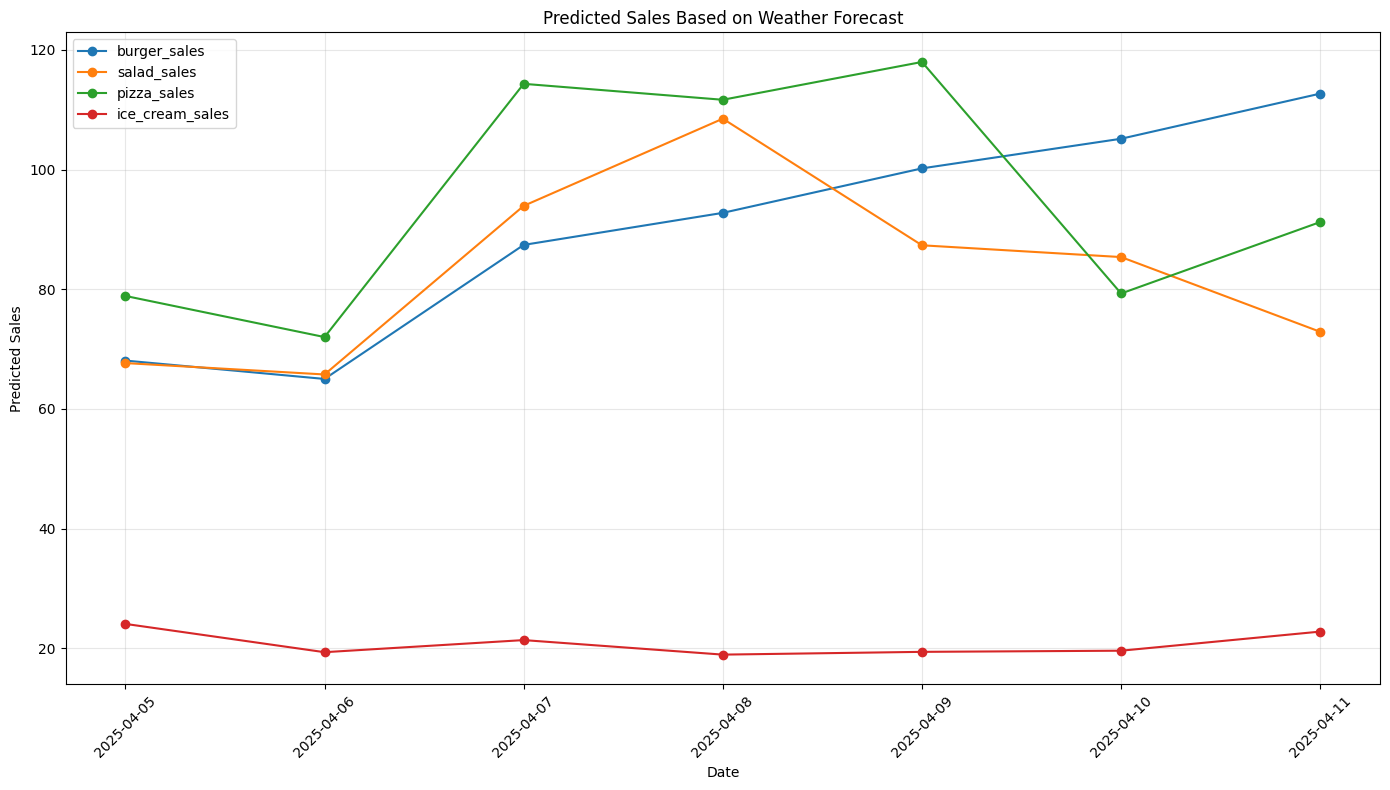

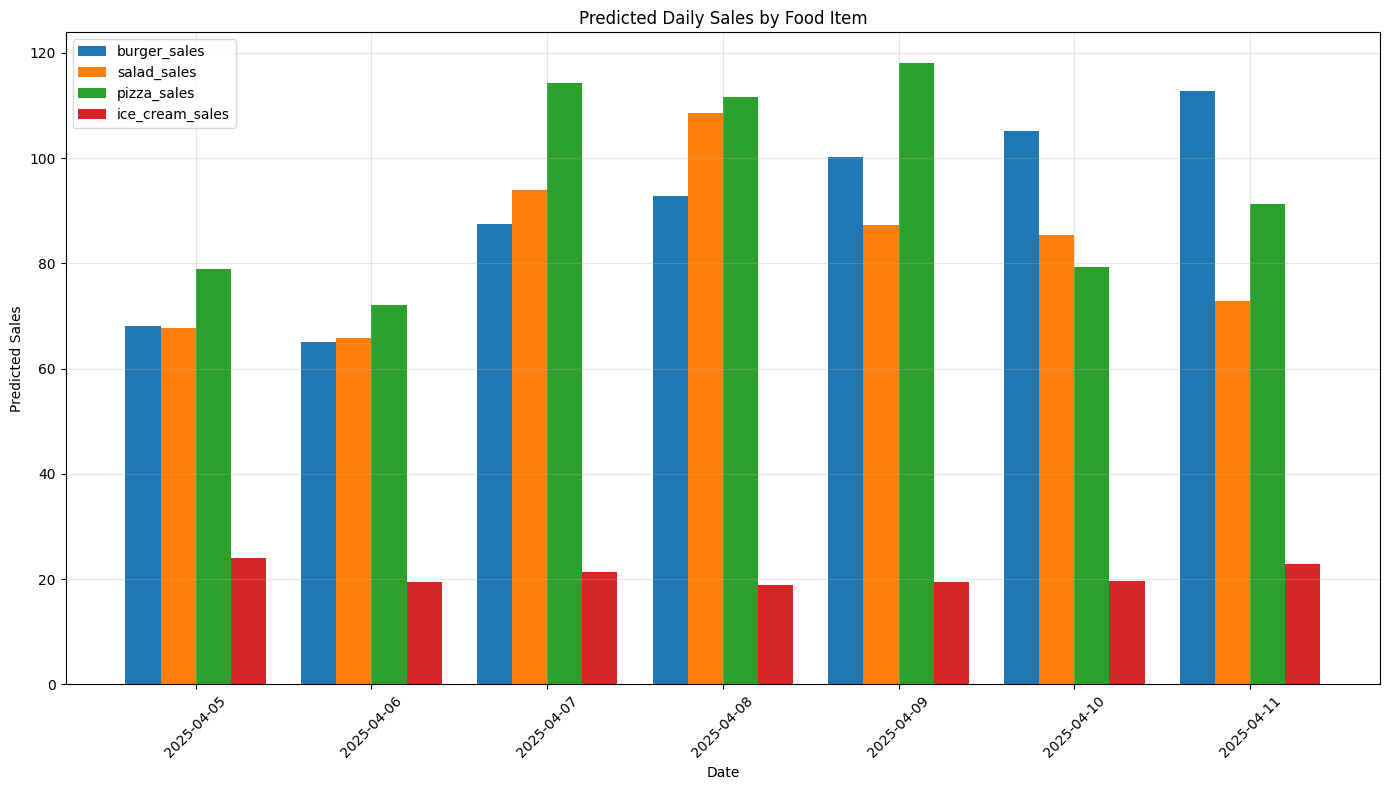


Predictions saved to 'sales_predictions.csv'


In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import json

# Step 1: Load the saved models
food_items = ['burger_sales', 'salad_sales', 'pizza_sales', 'ice_cream_sales']
models = {}

for item in food_items:
    model_filename = f'{item}_gradientboosting_model.pkl'
    try:
        with open(model_filename, 'rb') as f:
            models[item] = pickle.load(f)
        print(f"Loaded model for {item}")
    except FileNotFoundError:
        print(f"Warning: Model file {model_filename} not found")

# Step 2: Fetch weather data from Open-Meteo API
def fetch_weather_data():
    """Fetch weather data from Open-Meteo API"""
    print("Fetching weather data from Open-Meteo API...")
    
    # You can use the provided API URL
    url = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&daily=sunshine_duration,rain_sum,snowfall_sum,temperature_2m_mean&hourly=temperature_2m"
    
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error fetching data: {response.status_code}")
            return None
    except Exception as e:
        print(f"Exception occurred: {e}")
        return None

# Step 3: Process the weather data
def process_weather_data(data):
    """Process the weather data to the format needed for predictions"""
    if not data:
        print("No weather data to process")
        return None
    
    # Extract daily data
    daily_data = pd.DataFrame()
    daily_data['Date'] = pd.to_datetime(data['daily']['time'])
    daily_data['temperature_2m_mean'] = data['daily']['temperature_2m_mean']
    daily_data['sunshine_duration'] = data['daily']['sunshine_duration']
    daily_data['rain_sum'] = data['daily']['rain_sum']
    daily_data['snowfall_sum'] = data['daily']['snowfall_sum']
    
    # Extract month and day features
    daily_data['month'] = daily_data['Date'].dt.month
    daily_data['day_of_week'] = daily_data['Date'].dt.dayofweek
    daily_data['day_of_month'] = daily_data['Date'].dt.day
    
    # Since we don't have weather_description, we'll approximate it based on temperature and precipitation
    # This is a simplification and might need adjustment based on your model's training data
    conditions = [
        (daily_data['rain_sum'] > 5.0),
        (daily_data['rain_sum'] > 0.0) & (daily_data['rain_sum'] <= 5.0),
        (daily_data['snowfall_sum'] > 0.0),
        (daily_data['temperature_2m_mean'] < 0),
        (daily_data['sunshine_duration'] > 30000),
        (daily_data['sunshine_duration'] > 10000) & (daily_data['sunshine_duration'] <= 30000)
    ]
    
    choices = ['Rain', 'Light Drizzle', 'Snow', 'Light Snow', 'Sunny', 'Mainly Sunny']
    daily_data['weather_description'] = np.select(conditions, choices, default='Cloudy')
    
    # One-hot encode weather_description
    daily_data_encoded = pd.get_dummies(daily_data, columns=['weather_description'], drop_first=False)
    
    return daily_data_encoded

# Step 4: Make predictions
def predict_sales(processed_data, models):
    """Make sales predictions based on weather data"""
    if processed_data is None or not models:
        print("Cannot make predictions: missing data or models")
        return None
    
    # Select only the features needed for prediction
    required_features = set()
    for item in food_items:
        if item in models:
            required_features.update(models[item].feature_names_in_)
    
    # Check if all required features are present
    missing_features = required_features - set(processed_data.columns)
    if missing_features:
        print(f"Warning: Missing features: {missing_features}")
        # Add missing features with default values (0)
        for feature in missing_features:
            processed_data[feature] = 0
    
    # Make predictions for each food item
    predictions = {}
    for item, model in models.items():
        # Make sure the features are in the right order
        pred_data = processed_data[model.feature_names_in_]
        predictions[item] = model.predict(pred_data)
    
    # Add predictions to the data
    result_df = processed_data[['Date']].copy()
    for item in food_items:
        if item in models:
            result_df[item] = predictions[item]
    
    return result_df

# Step 5: Visualize the predictions
def visualize_predictions(predictions_df):
    """Visualize the sales predictions"""
    if predictions_df is None:
        print("No predictions to visualize")
        return
    
    # Plot daily predictions
    plt.figure(figsize=(14, 8))
    
    for item in food_items:
        if item in predictions_df.columns:
            plt.plot(predictions_df['Date'], predictions_df[item], marker='o', label=item)
    
    plt.xlabel('Date')
    plt.ylabel('Predicted Sales')
    plt.title('Predicted Sales Based on Weather Forecast')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plot as a bar chart
    plt.figure(figsize=(14, 8))
    
    days = [d.strftime('%Y-%m-%d') for d in predictions_df['Date']]
    x = np.arange(len(days))
    width = 0.2
    
    for i, item in enumerate(food_items):
        if item in predictions_df.columns:
            plt.bar(x + (i - 1.5) * width, predictions_df[item], width, label=item)
    
    plt.xlabel('Date')
    plt.ylabel('Predicted Sales')
    plt.title('Predicted Daily Sales by Food Item')
    plt.xticks(x, days, rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Main function to run everything
def main():
    # Use the weather data from the API
    weather_data = fetch_weather_data()
    
    # Process the weather data
    processed_data = process_weather_data(weather_data)
    
    if processed_data is not None:
        print("\nProcessed Weather Data:")
        print(processed_data[['Date', 'temperature_2m_mean', 'sunshine_duration', 'rain_sum', 'snowfall_sum']].head())
        
        # Make predictions
        predictions_df = predict_sales(processed_data, models)
        
        if predictions_df is not None:
            print("\nSales Predictions:")
            print(predictions_df)
            
            # Visualize the predictions
            visualize_predictions(predictions_df)
            
            # Export to CSV
            predictions_df.to_csv('sales_predictions.csv', index=False)
            print("\nPredictions saved to 'sales_predictions.csv'")
    else:
        print("Could not process weather data")
